In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout, Add, Input
from keras.models import Model

In [2]:
train_ds = keras.preprocessing.image_dataset_from_directory(
    directory='data/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(224,224)
    rotation_range=40,
    width_shift_range=0.1,
    height_shift_range=0.2,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_ds = keras.preprocessing.image_dataset_from_directory(
    directory='data/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(224,224)
)

Found 1319 files belonging to 2 classes.
Found 605 files belonging to 2 classes.


In [3]:
def process(image, label):
    image = tf.cast(image / 255., tf.float32)
    return image, label

train_ds = train_ds.map(process)
test_ds = test_ds.map(process)

Epoch 1/5
42/42 [==============================] - 102s 2s/step - loss: 0.5882 - accuracy: 0.6960 - val_loss: 0.4215 - val_accuracy: 0.9471
Epoch 2/5
42/42 [==============================] - 98s 2s/step - loss: 0.3637 - accuracy: 0.8946 - val_loss: 0.2644 - val_accuracy: 0.9421
Epoch 3/5
42/42 [==============================] - 98s 2s/step - loss: 0.2489 - accuracy: 0.9310 - val_loss: 0.2130 - val_accuracy: 0.9769
Epoch 4/5
42/42 [==============================] - 105s 3s/step - loss: 0.2055 - accuracy: 0.9363 - val_loss: 0.1452 - val_accuracy: 0.9554
Epoch 5/5
42/42 [==============================] - 99s 2s/step - loss: 0.1478 - accuracy: 0.9629 - val_loss: 0.1231 - val_accuracy: 0.9537


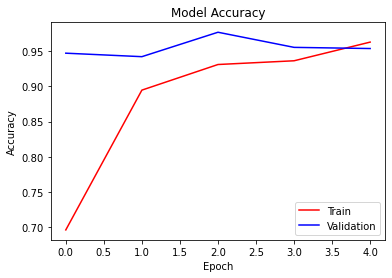

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import ResNet50
import matplotlib.pyplot as plt

# Load the ResNet50 model pre-trained on ImageNet
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224, 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False
# Add custom classification layers
model = keras.Sequential()
model.add(base_model)
model.add(keras.layers.GlobalAveragePooling2D())
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_ds, epochs=5, validation_data=test_ds)

# Plot accuracy
plt.plot(history.history['accuracy'], color='red', label='Train')
plt.plot(history.history['val_accuracy'], color='blue', label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1/1 [==============================] - 1s 1s/step
0


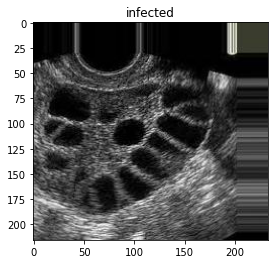

In [7]:
import matplotlib.pyplot as plt
from PIL import Image
test_image=r'data/train/infected/img_0_9136.jpg'
image_result=Image.open(test_image)

from tensorflow.keras.preprocessing import image
test_image=image.load_img(test_image,target_size=(224,224))
test_image=image.img_to_array(test_image)
test_image=test_image/255
test_image=np.expand_dims(test_image,axis=0)
result=model.predict(test_image)
print(np.argmax(result))
Categories=['infected','notinfected']
image_result=plt.imshow(image_result)
plt.title(Categories[np.argmax(result)])
plt.show()